# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('UNRATE.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 873):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [11]:
!pip3  install keras

     |████████████████████████████████| 3.0 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 14.5 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp38-cp38-macosx_10_9_x86_64.whl size=44624 sha256=8b4603381260fd18f31a865a6aefee1f5f8e983fc6712ade1459d17056d0ca1e
  Stored in directory: /Users/vjovanovic/Library/Caches/pip/wheels/13/90/db/290ab3a34f2ef0b5a0f89235dc2d40fea83e77de84ed2dc05c
Successfully built pyyaml


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [31]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

### Initialising the RNN

In [32]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [33]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [34]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [35]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [36]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [37]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [38]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [39]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
26/26 [==============================] - 1s 57ms/step - loss: 0.0219
Epoch 2/100
26/26 [==============================] - 1s 55ms/step - loss: 0.0109
Epoch 3/100
26/26 [==============================] - 1s 54ms/step - loss: 0.0102
Epoch 4/100
26/26 [==============================] - 1s 58ms/step - loss: 0.0083
Epoch 5/100
26/26 [==============================] - 2s 61ms/step - loss: 0.0076
Epoch 6/100
26/26 [==============================] - 1s 55ms/step - loss: 0.0071
Epoch 7/100
26/26 [==============================] - 1s 54ms/step - loss: 0.0062
Epoch 8/100
26/26 [==============================] - 1s 55ms/step - loss: 0.0057
Epoch 9/100
26/26 [==============================] - 1s 54ms/step - loss: 0.0056
Epoch 10/100
26/26 [==============================] - 1s 54ms/step - loss: 0.0058
Epoch 11/100
26/26 [==============================] - 1s 54ms/step - loss: 0.0051
Epoch 12/100
26/26 [==============================] - 1s 55ms/step - loss: 0.0051
Epoch 13/100
26/26 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real data

In [40]:
dataset_test = pd.read_csv('UNRATE.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted unemployment rate

In [45]:
dataset_total = pd.concat((dataset_train['UNRATE'], dataset_test['UNRATE']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 873):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

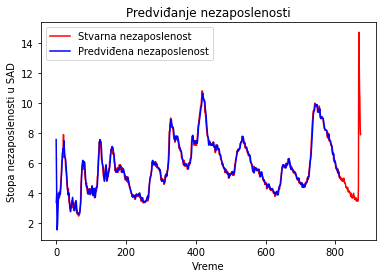

In [46]:
plt.plot(real_stock_price, color = 'red', label = 'Stvarna nezaposlenost')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predviđena nezaposlenost')
plt.title('Predviđanje nezaposlenosti')
plt.xlabel('Vreme')
plt.ylabel('Stopa nezaposlenosti u SAD')
plt.legend()
plt.show()